# Theoretical background

Consider a ligand-receptor system with atomic coordinates $\mathbf{x}^{T} = [ \mathbf{x}_{R}^{T}\ \mathbf{x}_{L}^{T}  ]$. 

The potential energy $E^{(X)}$ of the system is expanded around each $X$ metastable state: $E^{(X)}(\mathbf{x}) = E^{(X)}(\mathbf{x}_{0}) + \frac{1}{2}(\mathbf{x} - \mathbf{x}_{0})^{T}H^{(X)}(\mathbf{x} - \mathbf{x}_{0})$. We drop the state index $X$ for now, just mentioned it for later use.

We have noted $H$ the Hessian of $E$, which can be seen as a block matrix: $H=\left[\begin{array}{c c} H_{RR} & H_{RL} \\ H_{LR} & H_{LL} \end{array}\right]$. 

### Free energy and ensemble averages

The partition function $Z$ of metastable state $X$ is (noting $\beta^{-1} = k_{B}T$): 

$\begin{eqnarray}
Z &=& e^{-\beta E(\mathbf{x}_{0})}\int d\mathbf{x}\ e^{-\frac{1}{2}\mathbf{x}^{T}H\mathbf{x}}\\
&=& e^{-\beta E(\mathbf{x}_{0})}\int d\mathbf{x}_{R}\ e^{-\frac{1}{2}\mathbf{x}_{R}^{T}H_{RR}\mathbf{x}_{R}} \int d\mathbf{x}_{L}\ e^{-\frac{1}{2}\mathbf{x}_{L}^{T}H_{LL}\mathbf{x}_{L}-\frac{1}{2}\mathbf{x}_{L}^{T}H_{LR}\mathbf{x}_{R}-\frac{1}{2}\mathbf{x}_{R}^{T}H_{RL}\mathbf{x}_{L}}
\end{eqnarray}$ 

#### couple technical points
> The hessian is hermitian so $\mathbf{x}_{L}^{T}H_{LR}\mathbf{x}_{R} = (\mathbf{x}_{R}^{T}H_{LR}^{T}\mathbf{x}_{L})^{T} = \mathbf{x}_{R}^{T}H_{RL}\mathbf{x}_{L}$

> Gaussian integral: $\int\ d\mathbf{x}\ e^{-\frac{1}{2}\mathbf{x}^{T}A\mathbf{x}+B^{T}\mathbf{x}} = \sqrt{\frac{(2\pi)^{n}}{|A|}}e^{\frac{1}{2}B^{T}A^{-1}B}$.

We first integrate over the ligand degrees of freedom, before integrating over the receptor's:

$\begin{eqnarray}
Z &=& \sqrt{\frac{(2\pi)^{N_{L}}}{|H_{LL}|}}e^{-\beta E(\mathbf{x}_{0})}\int d\mathbf{x}_{R}\ e^{-\frac{1}{2}\mathbf{x}_{R}^{T}H_{RR}\mathbf{x}_{R}}\ e^{\frac{1}{2}\mathbf{x}_{R}^{T}H_{RL}H_{LL}^{-1}H_{LR}\mathbf{x}_{R}}\\
&=& \sqrt{\frac{(2\pi)^{N_{L}+N_{R}}}{|H_{LL}||H_{RR,eff}|}}e^{-\beta E(\mathbf{x}_{0})}\\
&&\text{where }H_{RR,eff} = H_{RR} - H_{RL}H_{LL}^{-1}H_{LR}
\end{eqnarray}$

We have thus derived an effective potential for the receptor where the interactions with the ligand have been integrated out. 

The free energy of the system (assuming it has only one metastable state) is thus:

$
F = E(\mathbf{x}_{0}) + \frac{k_{B}T}{2} [ \log \text{Det}(H_{LL}) + \log \text{Det}(H_{RR,eff}) - (N_{L}+N_{R}) \log 2\pi] 
$.

Going further, it is possible to compute the equilibrium value of any function of the receptor's degrees of freedom (noting $Z_{R} = \sqrt{\frac{(2\pi)^{N_{R}}}{|H_{RR,eff}|}}$):

$
<f(\mathbf{x}_{R})>\ =\ Z_{R}^{-1} \int d\mathbf{x}_{R}\ e^{-\frac{1}{2}\mathbf{x}_{R}^{T}H_{RR,eff}\mathbf{x}_{R}}\ f(\mathbf{x}_{R})
$

### Coupling perturbation

Assuming that one perturbs the coupling between ligand and receptor while keeping their structure constant (constant number of atoms whose average position is maintained, up to a rotation or translation of the ligand), only the effective Hessian is affected, and the free energy change is:

$\begin{eqnarray}
\partial F &=& k_{B}T |H_{RR,eff}|^{-1} \partial |H_{RR,eff}|\\
\end{eqnarray}$

This expression could be used to probe the stabilizing or destabilizing role of individual coupling. 

In a more operative fashion for the overall ligand binding event, we consider the change:

$\begin{eqnarray}
F(\text{liganded}) - F(\text{unliganded}) = \frac{k_{B}T}{2}\ [ \log \text{Det}(H_{RR,eff}) - \log \text{Det}(H_{RR}) ]
\end{eqnarray}$

Noting $\lambda_{i} = \omega_{i}^{2}$ the eigenvalues of $H_{RR}$, the free-energy change upon binding is :

$\begin{eqnarray}
\Delta F &=& k_{B}T \sum_{i}^{3N_{R}}\log \frac{\omega_{i}^{*}}{\omega_{i}}
\end{eqnarray}$

# Implementation
[ before running through the cells below, we load the necessary libraries, and run the Toolkit cells at the end of the notebook ]

In [1]:
%matplotlib inline
import numpy as np                    # load numerical library
from matplotlib import pyplot as plt  # load plotting library
from prody import *                   # load prody library

Define parameters and variables...

In [2]:
pdbs_folder  = 'pdbs'           # local folder where PDB files can be found
pdb_filename = '5wku_CLOSED-ASIC-CA_45to455_withAB.pdb' #'4FZ0.pdb'       # name of PDB considered for the analysis (must be found in pdbs_folder)
cutoff=15.0                     # distance cutoff to couple pairs of atoms
gamma=1.0                       # see ProDy
whole_selection     ='protein and name CA'              # set of all atoms considered          
receptor_selection =whole_selection+' and (chain A or chain B or chain C)'  # subset of whole_selection, for receptor
ligand_selection   =whole_selection+' and not (chain A or chain B or chain C)'      # subset of whole_selection, for ligand


Load PDB object

In [3]:
pdb1 = parsePDB(pdbs_folder+'/'+pdb_filename)

@> 2523 atoms and 1 coordinate set(s) were parsed in 0.92s.


Compute uncoupled and effective receptor-receptor Hessians:

In [7]:
HRR     = get_effective_hessian(pdb1,whole_selection=whole_selection,ligand_selection=ligand_selection,coupling=0.0)
HRR_eff = get_effective_hessian(pdb1,whole_selection=whole_selection,ligand_selection=ligand_selection,coupling=1.0)

@> Hessian was built in 32.95s.
@> Hessian was built in 43.82s.


Size of the hessian:  (3699, 3699)
Size of the hessian:  (3699, 3699)
Size of the hessian:  (3699, 3699)


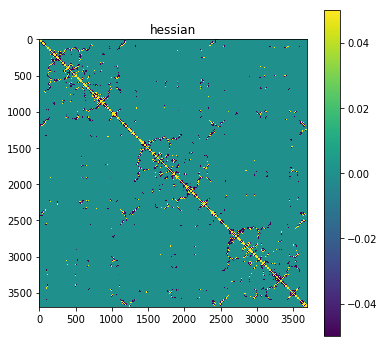

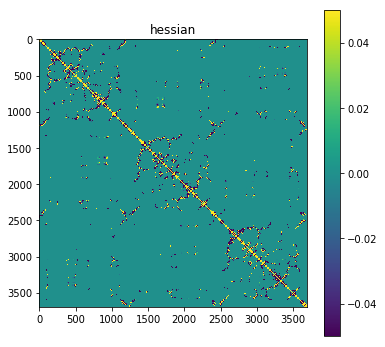

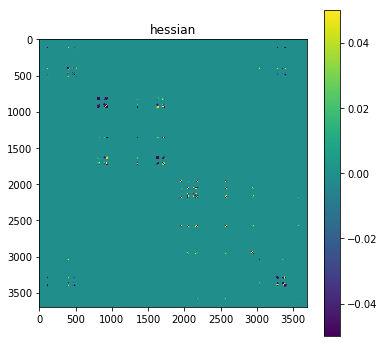

In [8]:
for Hessian in HRR,HRR_eff,HRR_eff-HRR:
    plot_hessian(Hessian,vrange=[-0.05,0.05],figsize=6)

Compute eigenvalues and associated normal modes

In [9]:
l,v         = get_eigen(HRR)
l_eff,v_eff = get_eigen(HRR_eff)

In [17]:
cross = np.dot(v.T,v_eff)

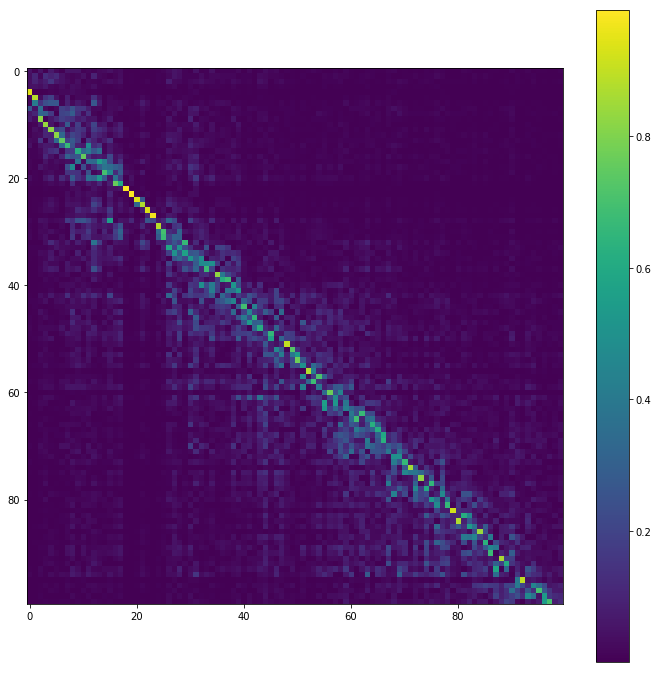

In [51]:
#plt.plot(np.abs(cross[2,0:100]),'.-')
#plt.grid()
fig = plt.figure(figsize=(12,12))
plt.imshow(np.abs(cross[0:100,7:107]))
plt.colorbar()

Plot uncoupled (black) and coupled (red) spectrum:

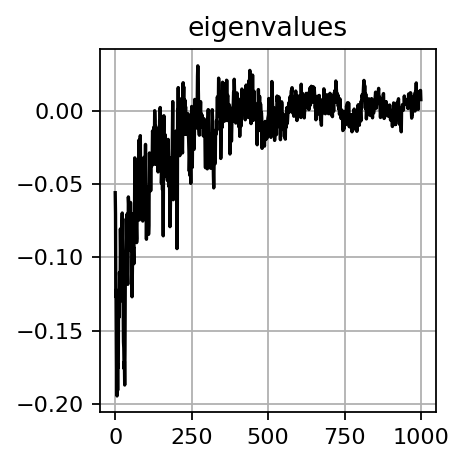

In [50]:
#plot_spectrum(l[0:1000],l2=l_eff[5:1005],figsize=3)
plot_spectrum(l[0:1000]-l_eff[7:1007],figsize=3)

Now plot $\log \frac{\omega_{eff}}{\omega}$

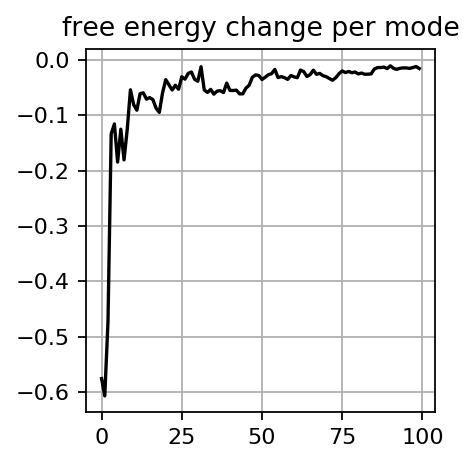

In [14]:
plot_spectrum(np.log(l_eff[0:100]/l[0:100])/2,figsize=3,title='free energy change per mode')

Finally, give the total free energy change upon binding:

In [13]:
deltaF = get_binding_energy(spectrum_unbound=l,spectrum_bound=l_eff)

Binding free energy (in units of kT):  -13.6499451692


### TOOLKIT

In [5]:
def get_binding_energy(spectrum_unbound=None,spectrum_bound=None):
    """get_binding_energy
    """
    deltaF=None
    if spectrum_unbound is not None and spectrum_bound is not None:
        deltaF = np.sum(np.log(spectrum_bound/spectrum_unbound))/2.0
        print('Binding free energy (in units of kT): ',deltaF)
    return deltaF
    
def get_effective_hessian(pdb,whole_selection='protein',ligand_selection=None,coupling=1.0,cutoff=15.0,gamma=1.0):
    """ get_effective_hessian
    """
    whole_hessian = get_hessian(pdb1,whole_selection,cutoff=cutoff,gamma=gamma)
    receptor_idx,ligand_idx = get_idxs(pdb,whole_selection=whole_selection,subset_selection=ligand_selection)
    HRR = whole_hessian[receptor_idx,:][:,receptor_idx]
    HLL = whole_hessian[ligand_idx,:][:,ligand_idx]
    HLR = coupling*whole_hessian[ligand_idx,:][:,receptor_idx]
    HRL = coupling*whole_hessian[receptor_idx,:][:,ligand_idx]
    HRR_eff = HRR - np.dot(HRL,np.dot(np.linalg.inv(HLL),HLR))
    return HRR_eff

def get_idxs(pdb,whole_selection='protein',subset_selection=None):
    """
    """
    whole_selected  = pdb.select(whole_selection)
    subset_selected = pdb.select(subset_selection)
    whole_indices   = whole_selected.getIndices()
    subset_indices  = subset_selected.getIndices()
    mask = np.in1d(whole_indices,subset_indices,invert=True)
    complement_indices = whole_indices[mask]    
    ligand_idx   = get_hessian_idx(whole_indices,subset_indices)
    receptor_idx = get_hessian_idx(whole_indices,complement_indices)    
    return receptor_idx,ligand_idx

def get_hessian_idx(big_array, subset_array):
    """
    """
    index = np.argsort(big_array)
    sorted_big_array = big_array[index]
    sorted_index = np.searchsorted(sorted_big_array, subset_array)
    yindex = np.take(index, sorted_index, mode="clip")
    mask = big_array[yindex] != subset_array
    result = np.ma.array(yindex, mask=mask)
    idx = []
    #n=0
    for i in np.arange(result.shape[0]):
        for k in np.arange(0,3):
            #n+=1
            idx.append(3*(result[i])+k)
    return idx
    
def get_hessian(pdb,atom_selection,cutoff=15.0,gamma=1.0):
    """ get_hessian
    """
    atom_selected = pdb.select(atom_selection)
    anm = ANM(atom_selection)
    anm.buildHessian(atom_selected,cutoff=cutoff,gamma=gamma)
    return anm.getHessian()

def get_eigen(Hessian,keep_6first=False):
    eigenvalues, eigenvectors = eigenpb(Hessian)
    index = np.argsort(eigenvalues)
    l = eigenvalues[index]
    v = eigenvectors[:,index]
    if keep_6first:
        istart=0
    else:
        istart=6
    return l[istart:],v[:,istart:]

def eigenpb(matrix):
    """ eigenpb
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors


In [6]:
def plot_hessian(hessian,xyrange=None,sampling=1,vrange=[0,1],figsize=12):
    """ plot_hessian: show Hessian matrix
    Parameters
    ----------
    - xyrange  : the first and last index you want to plot. Namely hessian[range[0]:range[1],range[0]:range[1]]
    - sampling : only show every sampling-th index
    - vrange   : restrict the color value to that range
    """
    #hessian = anm.getHessian()
    print("Size of the hessian: ",hessian.shape)
    if xyrange is None:
        xrange=[0,hessian.shape[0]]
        yrange=[0,hessian.shape[1]]
    fig = plt.figure(figsize=(figsize,figsize))
    plt.imshow(hessian[xrange[0]:xrange[1]:sampling,yrange[0]:yrange[1]:sampling],cmap='viridis',vmin=vrange[0],vmax=vrange[1])
    plt.colorbar()
    plt.title('hessian')
    
def plot_spectrum(eigenvalues,l2=None,figsize=12,title='eigenvalues'):
    """ plot_spectrum: ...
    """
    nrow=1
    ncol=1
    fig = plt.figure(figsize=(figsize, figsize), dpi= 160, facecolor='w', edgecolor='k')
    plt.subplot(nrow,ncol,1)
    plt.title(title)
    plt.grid()
    plt.plot(eigenvalues,'-',color='k')
    if l2 is not None:
        plt.plot(l2,'-',color='red')
    plt.tight_layout()
    plt.show()